In [92]:
import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [94]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4768,ham,watever reLation u built up in dis world only ...,NaN,NaN,NaN
263,spam,Hey I am really horny want to chat or see me n...,NaN,NaN,NaN
4144,ham,Lol I would but despite these cramps I like be...,NaN,NaN,NaN
1825,ham,Wat makes some people dearer is not just de ha...,NaN,NaN,NaN
443,ham,"Sorry, I'll call later",NaN,NaN,NaN


In [95]:
df.shape

(5572, 5)

In [96]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [98]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [99]:
df.sample(5)

,v1,v2
3439,ham,What time you thinkin of goin?
4034,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...
1556,ham,Good sleep is about rhythm. The person has to ...
1738,ham,K go and sleep well. Take rest:-).
3671,ham,"came to look at the flat, seems ok, in his 50..."


In [100]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
154,ham,"You are everywhere dirt, on the floor, the win..."
361,ham,Oh ok no prob..
4734,ham,Oh k:)after that placement there ah?
819,ham,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...
957,ham,Welp apparently he retired


In [101]:
# convert target column to integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [102]:
df['target'] = encoder.fit_transform(df['target'])

In [103]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [105]:
# check for duplicate values
df.duplicated().sum()

403

In [106]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [107]:
df.duplicated().sum()

0

In [108]:
df.shape

(5169, 2)

## 2. EDA

In [109]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

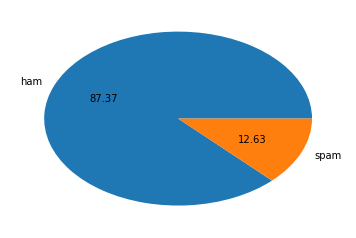

In [111]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [112]:
# Data is imbalanced

In [113]:
import nltk  # NLP library

In [114]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [115]:
# count number of characters in each string
df['num_characters'] = df['text'].apply(len)

In [116]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [117]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [118]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [119]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [120]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [121]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [122]:
# visualizing ham and spam messages seperately
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [123]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [124]:
import seaborn as sns

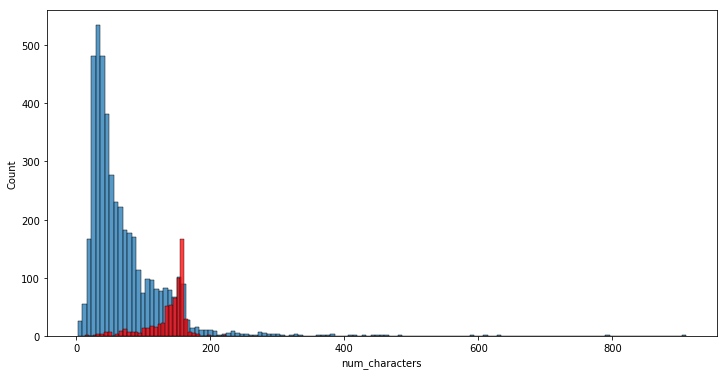

In [125]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

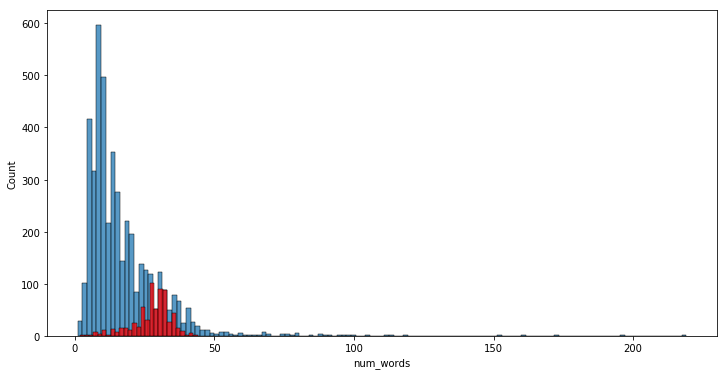

In [126]:
# same analysis for num_words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

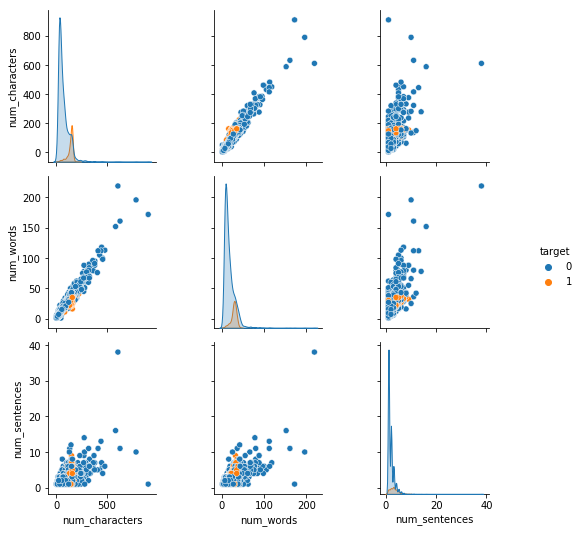

In [127]:
sns.pairplot(df, hue='target')

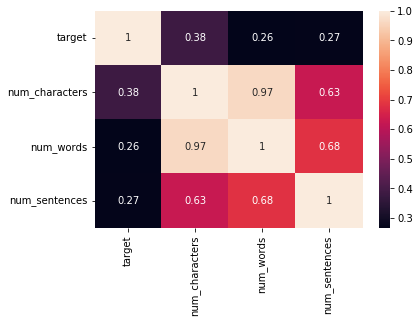

In [128]:
# pearsor correlation coefficient
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing

o Lower case <br>
o Tokenization <br>
o Removing special characters <br>
o Removing stop words and punctuation <br>
o Stemming

In [129]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [130]:
def transform_text(text):
    # lower case
    text = text.lower()
    # tokenization
    words = nltk.word_tokenize(text)
    
    # removing special characters
    alpha_numeric = []
    for word in words:
        if word.isalnum():
            alpha_numeric.append(word)
    
    # removing stopwords and punctuation
    cleaned_words = []
    for word in alpha_numeric:
        if word not in stopwords.words('english') and word not in string.punctuation:
            cleaned_words.append(word)
            
    # stemming
    ps = PorterStemmer()
    for idx, word in enumerate(cleaned_words):
        cleaned_words[idx] = ps.stem(word)
        
    transformed_text = " ".join(cleaned_words)
    return transformed_text

In [131]:
df['transformed_text'] = df['text'].apply(transform_text)

In [132]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [133]:
# wordcloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [134]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

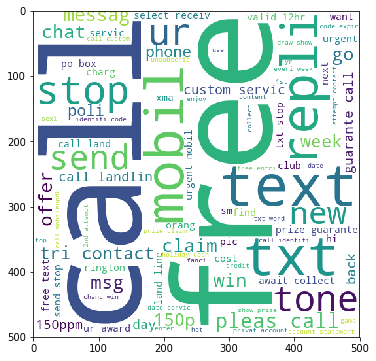

In [135]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [136]:
# wordcloud for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

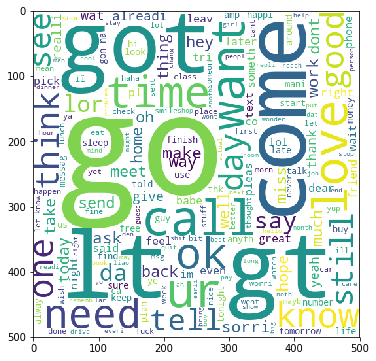

In [137]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [138]:
# getting top 50 words for spam and ham messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [139]:
len(spam_corpus) # total 9883 words in spam messages

9883

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5,1,'50 most common words in spam messages')

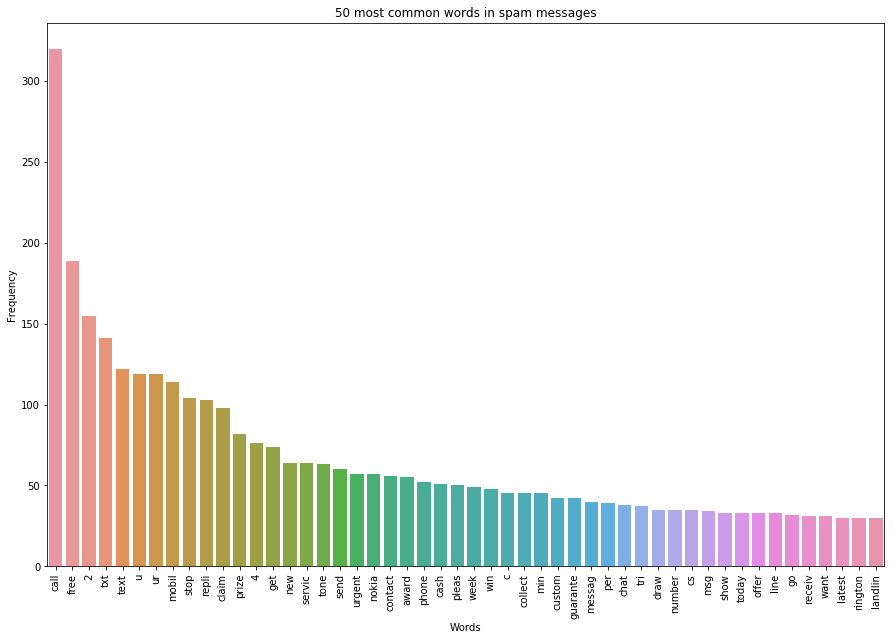

In [140]:
from collections import Counter
plt.figure(figsize = (15, 10))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0], pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('50 most common words in spam messages')

In [141]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [142]:
len(ham_corpus)

34771

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5,1,'50 most common words in ham messages')

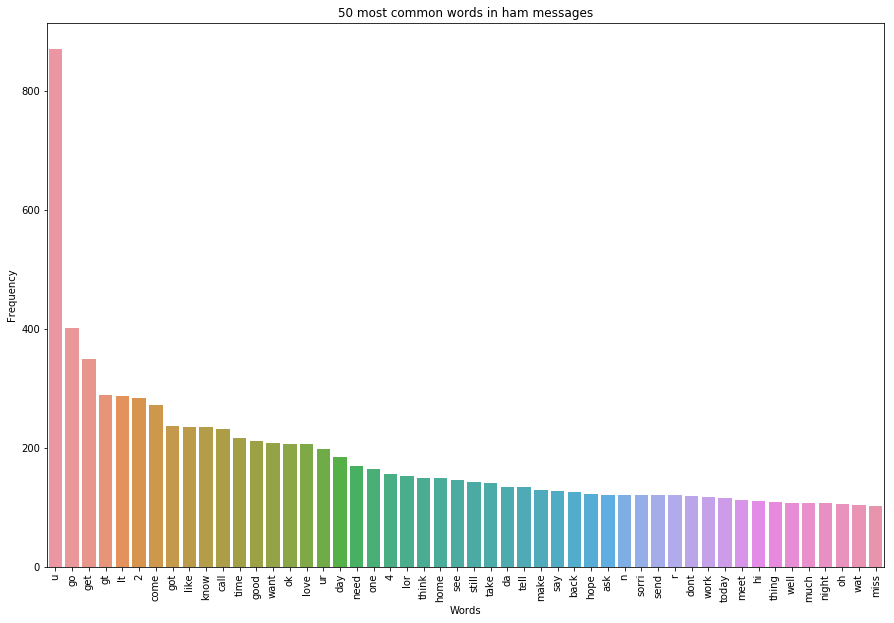

In [143]:
from collections import Counter
plt.figure(figsize = (15, 10))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0], pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('50 most common words in ham messages')

## 4. Model Building

In [144]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [145]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [146]:
# scaling(not adding value in this case)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [147]:
# appending the num_character col to X
# X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))

In [148]:
y = df['target'].values

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [151]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [152]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [153]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [154]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [155]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [156]:
# in this case precision_score matters more than accuracy_score (as data is imbalanced)
# will go with tfidf and mnb
# lets try some other models also

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [158]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [159]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [160]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [161]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8527131782945736
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9468085106382979
Precision -  0.946236559139785


In [162]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending = False)

In [163]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
10,xgb,0.946809,0.946237
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
7,BgC,0.954545,0.852713


In [164]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [165]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.971954
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.957447
6,xgb,Accuracy,0.946809
7,AdaBoost,Accuracy,0.964217
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.954545


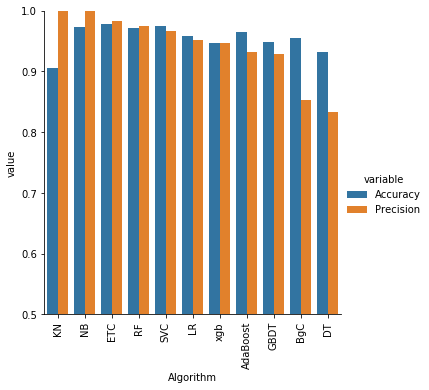

In [166]:
sns.catplot(x = 'Algorithm', y='value', 
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [167]:
# model improve
# 1. Change the max_featur

In [168]:
# Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [169]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [170]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [171]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.975609756097561


In [172]:
# Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [173]:
# from sklearn.ensemble import StackingClassifier

In [174]:
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [175]:
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy", accuracy_score(y_test, y_pred))
# print("Precision", precision_score(y_test, y_pred))

In [176]:
# we will use mnb as it is our best performing model

# now we will create a pipeline and convert it into a website

In [177]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [178]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))